<a href="https://colab.research.google.com/github/rsbaye/Data-Science-Projects/blob/main/LMM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

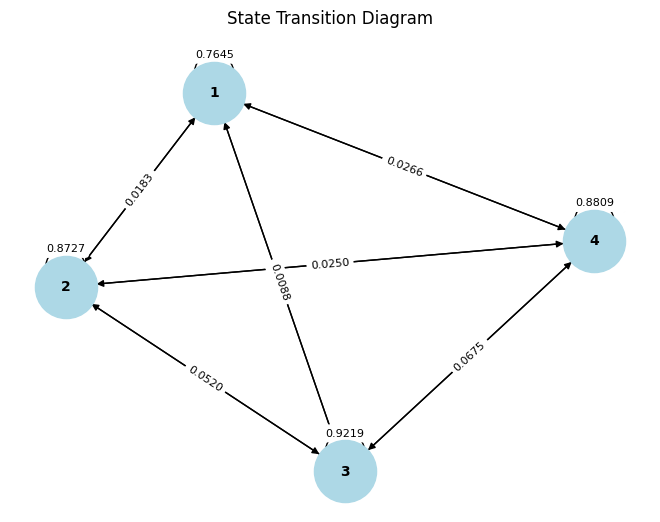

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

# Define the transition matrix
transition_matrix = {
    1: {1: 0.7645, 2: 0.1568, 3: 0.0642, 4: 0.0145},
    2: {1: 0.0183, 2: 0.8727, 3: 0.0925, 4: 0.0165},
    3: {1: 0.0088, 2: 0.0520, 3: 0.9219, 4: 0.0173},
    4: {1: 0.0266, 2: 0.0250, 3: 0.0675, 4: 0.8809},
}

# Create a directed graph
G = nx.DiGraph()

# Add edges with weights
for from_state, to_states in transition_matrix.items():
    for to_state, prob in to_states.items():
        G.add_edge(from_state, to_state, weight=prob)

# Draw the graph
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=2000, node_color="lightblue", font_size=10, font_weight="bold")
edge_labels = {(u, v): f"{d['weight']:.4f}" for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

plt.title("State Transition Diagram")
plt.show()

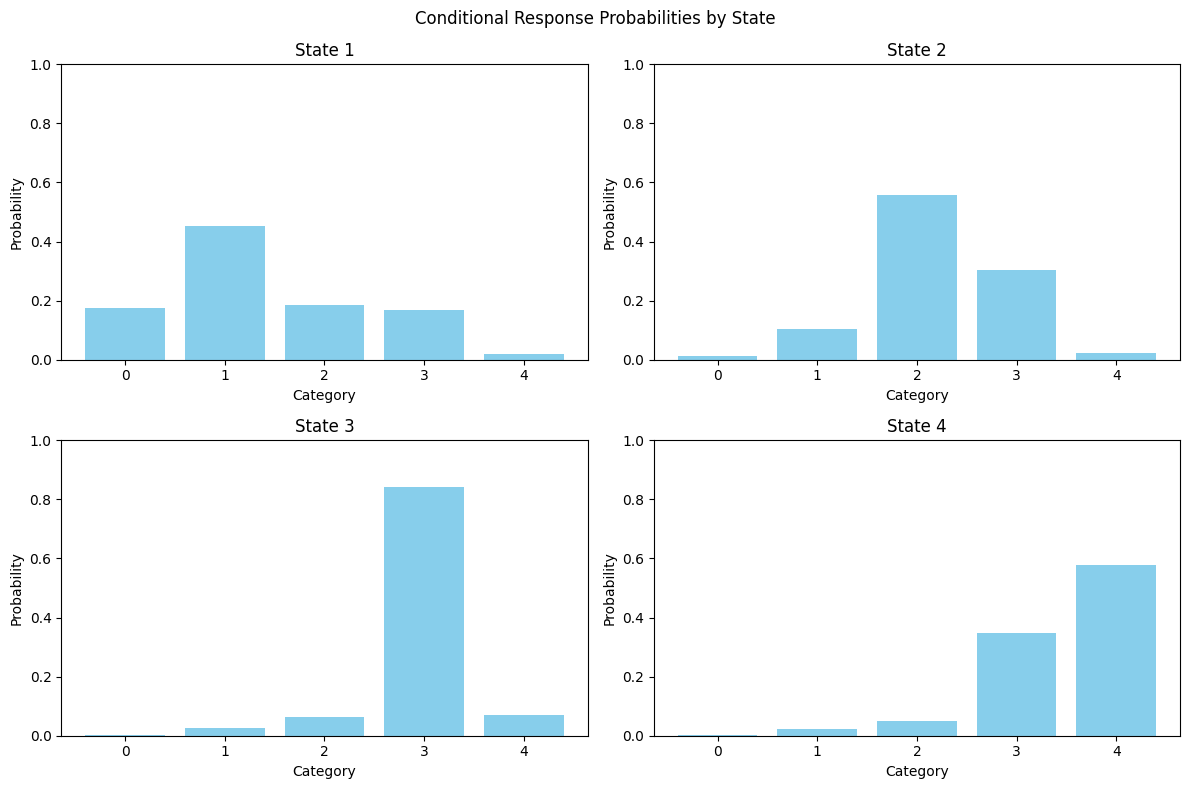

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Conditional response probabilities matrix
response_matrix = np.array([
    [0.1748, 0.0111, 0.0009, 0.0030],
    [0.4541, 0.1035, 0.0248, 0.0222],
    [0.1851, 0.5576, 0.0635, 0.0493],
    [0.1679, 0.3040, 0.8413, 0.3463],
    [0.0181, 0.0239, 0.0694, 0.5793],
])

# Categories and states
categories = [0, 1, 2, 3, 4]
states = ['State 1', 'State 2', 'State 3', 'State 4']

# Plotting
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle("Conditional Response Probabilities by State")

for i, ax in enumerate(axes.flatten()):
    ax.bar(categories, response_matrix[:, i], color='skyblue')
    ax.set_title(states[i])
    ax.set_xlabel("Category")
    ax.set_ylabel("Probability")
    ax.set_ylim(0, 1)
    ax.set_xticks(categories)

plt.tight_layout()
plt.show()

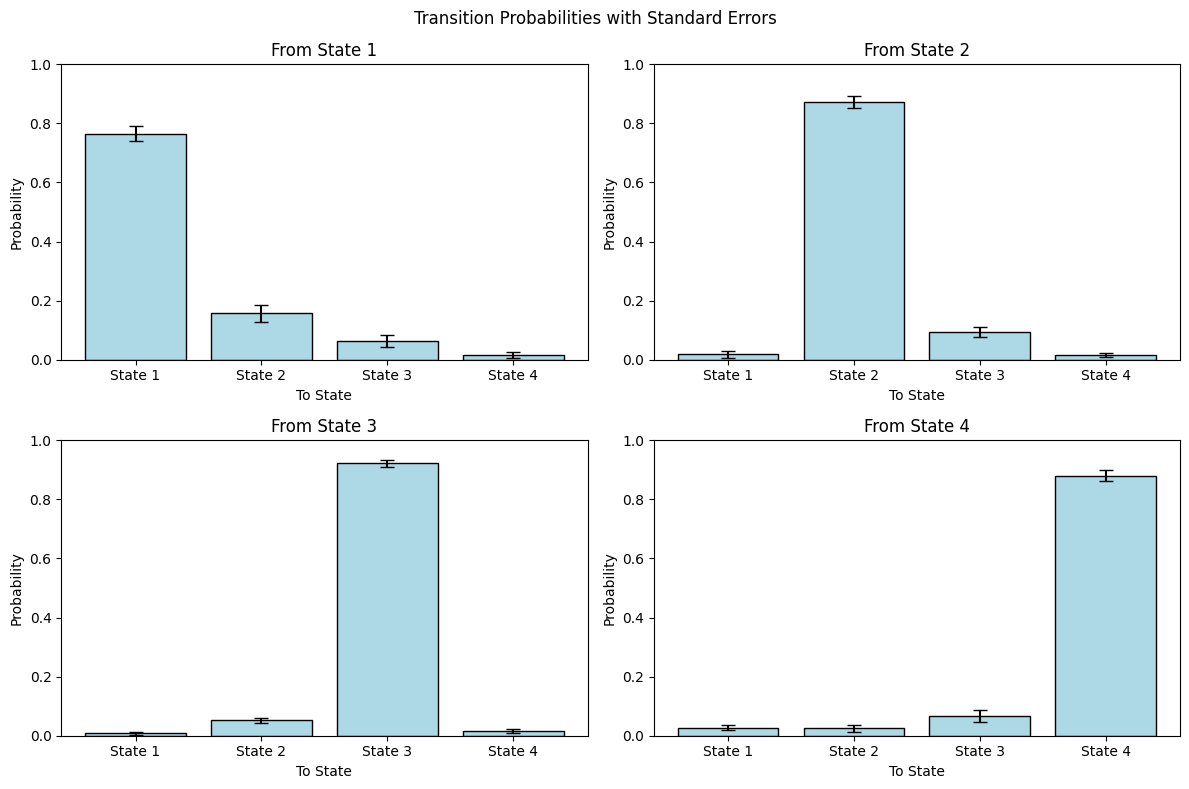

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Transition probabilities matrix
transition_matrix = np.array([
    [0.7645, 0.1568, 0.0642, 0.0145],
    [0.0183, 0.8727, 0.0925, 0.0165],
    [0.0088, 0.0520, 0.9219, 0.0173],
    [0.0266, 0.0250, 0.0675, 0.8809],
])

# Standard errors matrix
se_matrix = np.array([
    [0.0251, 0.0299, 0.0199, 0.0103],
    [0.0119, 0.0208, 0.0171, 0.0077],
    [0.0047, 0.0093, 0.0105, 0.0064],
    [0.0085, 0.0110, 0.0198, 0.0197],
])

# States
states = ['State 1', 'State 2', 'State 3', 'State 4']

# Plotting
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle("Transition Probabilities with Standard Errors")

for i, ax in enumerate(axes.flatten()):
    x = np.arange(len(states))  # x-axis positions
    ax.bar(x, transition_matrix[i], yerr=se_matrix[i], capsize=5, color='lightblue', edgecolor='black')
    ax.set_title(f"From {states[i]}")
    ax.set_xlabel("To State")
    ax.set_ylabel("Probability")
    ax.set_xticks(x)
    ax.set_xticklabels(states)
    ax.set_ylim(0, 1)

plt.tight_layout()
plt.show()